# Test PDPbox with binary classification problem
## Kaggle Titanic
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import os

%matplotlib inline

### read dataset

In [2]:
titanic = pd.read_csv('titanic_train.csv')

### simple feature engineering

#### impute null values

In [3]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].dropna().median())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

#### handle categrical features

In [4]:
titanic['Sex'] = titanic['Sex'].apply(lambda x : 1 if x == 'male' else 0)
titanic = pd.get_dummies(titanic, columns=['Embarked'])

#### features to used

In [5]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

## Decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
from pdpbox import pdp

In [9]:
dt = DecisionTreeClassifier(random_state=24, max_leaf_nodes=20)
%time dt.fit(titanic[features], titanic['Survived'])

Wall time: 8 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=24,
            splitter='best')

## numeric feature: Fare

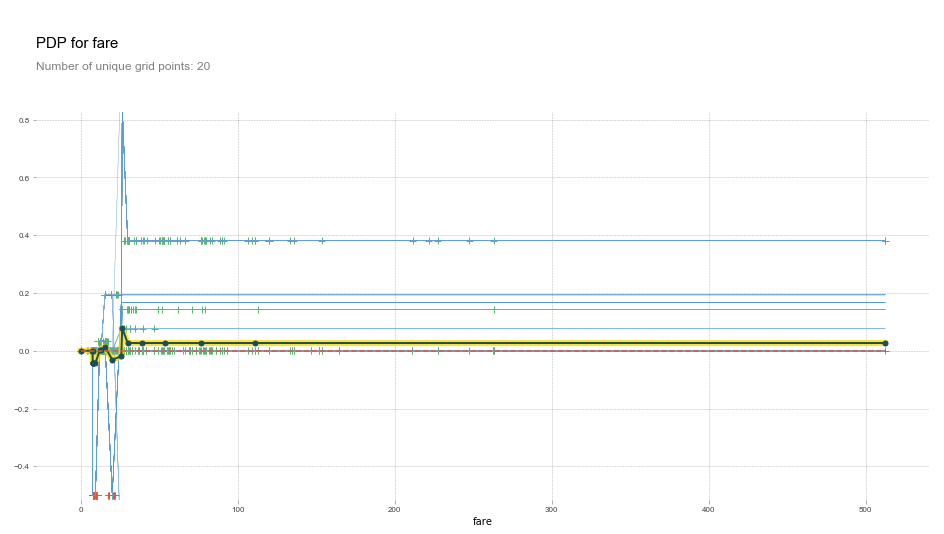

In [10]:
pdp_fare_dt = pdp.pdp_isolate(dt, titanic[features], 'Fare', num_grid_points=20)
pdp.pdp_plot(pdp_fare_dt, 'fare', plot_org_pts=True, plot_lines=True, frac_to_plot=1)

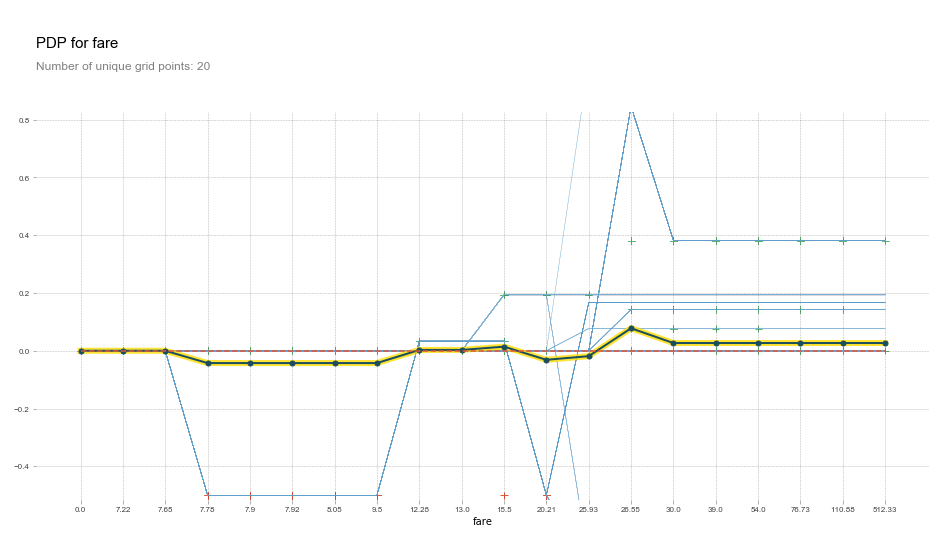

In [11]:
pdp.pdp_plot(pdp_fare_dt, 'fare', plot_org_pts=True, plot_lines=True, frac_to_plot=1, x_quantile=True)

## ont-hot encoding feature: Embarked

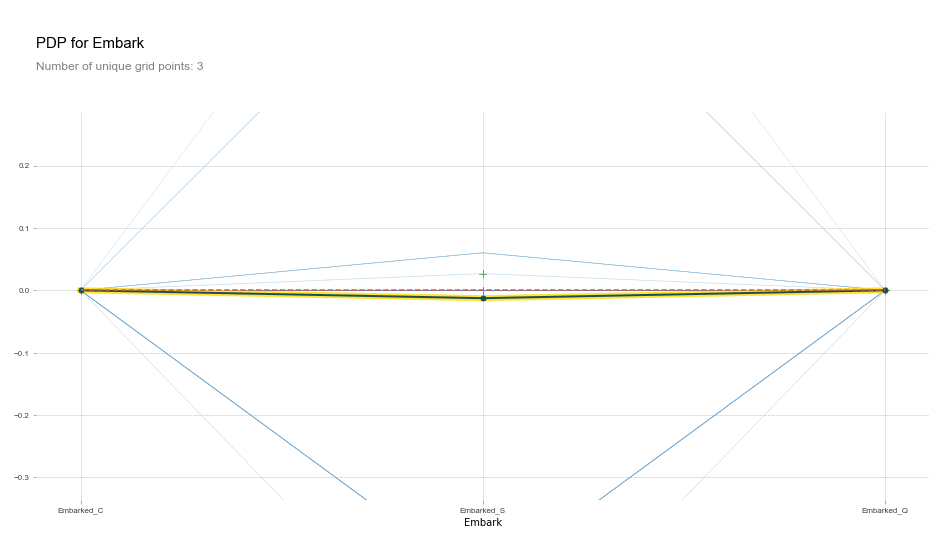

In [12]:
pdp_embark_dt = pdp.pdp_isolate(dt, titanic[features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])
pdp.pdp_plot(pdp_embark_dt, 'Embark', plot_org_pts=True, plot_lines=True, frac_to_plot=100)

## interaction between age and fare

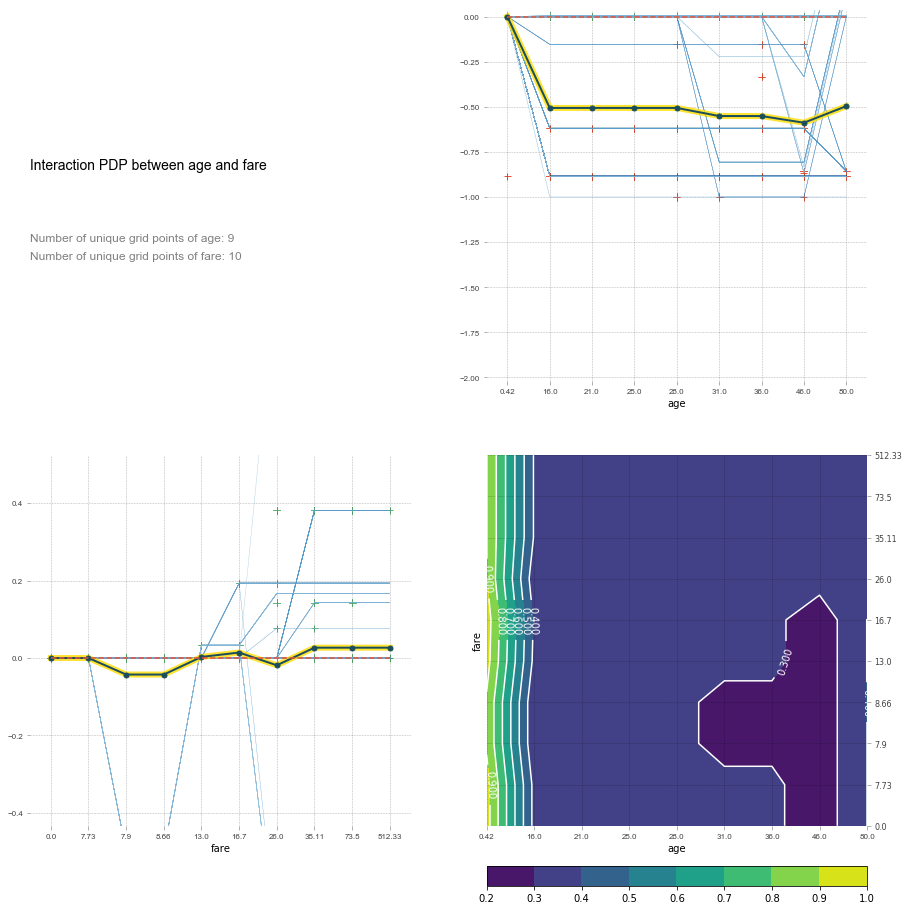

In [13]:
inter_dt = pdp.pdp_interact(dt, titanic[features], ['Age', 'Fare'], num_grid_points=[10, 10])
pdp.pdp_interact_plot(inter_dt, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)